<a href="https://colab.research.google.com/github/Cyrill98/Python-Image-Processing/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = x_test.shape)

In [6]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0. , 1.)

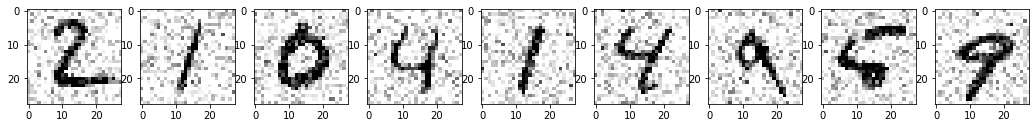

In [7]:
plt.figure(figsize = (20, 2))
for i in range(1, 10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28), cmap = 'binary')

plt.show()

In [8]:
SIZE = 28

In [9]:
model = Sequential()
model.add(Conv2D (32, (3, 3), activation= 'relu', padding = 'same', input_shape = (SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D (8, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D (8, (3, 3), activation= 'relu', padding = 'same'))

In [10]:
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D (8, (3, 3), activation= 'relu', padding = 'same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D (8, (3, 3), activation = 'relu', padding = 'same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D (32, (3, 3), activation = 'relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D (1, (3, 3), activation= 'relu', padding = 'same'))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [12]:
model.fit(x_train_noisy, x_train, epochs = 10, batch_size= 256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 112s 474ms/step - loss: 0.0500 - val_loss: 0.0339
Epoch 2/10
235/235 [==============================] - 112s 476ms/step - loss: 0.0301 - val_loss: 0.0271
Epoch 3/10
235/235 [==============================] - 112s 478ms/step - loss: 0.0251 - val_loss: 0.0234
Epoch 4/10
235/235 [==============================] - 112s 479ms/step - loss: 0.0227 - val_loss: 0.0216
Epoch 5/10
235/235 [==============================] - 113s 480ms/step - loss: 0.0212 - val_loss: 0.0201
Epoch 6/10
235/235 [==============================] - 113s 482ms/step - loss: 0.0200 - val_loss: 0.0191
Epoch 7/10
235/235 [==============================] - 113s 481ms/step - loss: 0.0190 - val_loss: 0.0182
Epoch 8/10
235/235 [==============================] - 113s 482ms/step - loss: 0.0182 - val_loss: 0.0176
Epoch 9/10
235/235 [==============================] - 113s 482ms/step - loss: 0.0176 - val_loss: 0.0175
Epoch 10/10
235/235 [==============================] - 112s 478m

In [13]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0165


0.016511095687747

In [14]:
model.save('denoising_autoencoder.model')

INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


In [15]:
no_noise_img = model.predict(x_test_noisy)

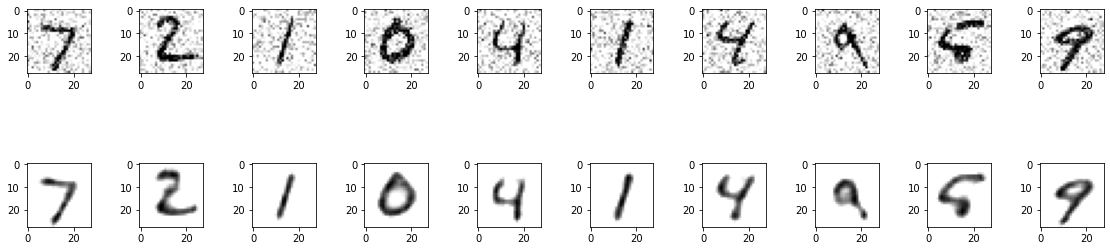

In [16]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()